<a href="https://colab.research.google.com/github/UROOJR1/GOLD-PRICE-PREDICTION/blob/main/PROJECT_GOLD_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE ESSENTIAL LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING THE LIBRARIES REQUIRED FOR PREPROCESSING AND FOR MODE EVALUATION

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

IMPORTING LIBRARIES FOR REGRESSION MODELS

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

LOADING AND EXPLORING THE DATASET

In [4]:
gold_dataset=pd.read_csv('/content/gld_price_data.csv')

DISPLAY THE FIRST FIVE ROWS OF A DATASET

In [5]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


CHECKING THE LAST FIVE ROWS OF A DATASET

In [6]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


FINDING THE NO.OF ROWS AND COLUMNS IN A DATASET

In [7]:
gold_dataset.shape

(2290, 6)

GETTING BASIC INFORMATION ABOUT THE DATA

In [8]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


CHECKING FOR MISSING VALUES

In [9]:
print(gold_dataset.isnull().sum())
print((gold_dataset.isnull().sum()/len(gold_dataset))*100)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64
Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64


DROPPING THE IRRELEVANT COLUMN

In [10]:
gold_dataset=gold_dataset.drop(columns=['Date'],axis=1)

In [11]:
gold_dataset.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


CHECKING STATISTICAL SUMMARY

In [12]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CHECKING FOR DUPLICATE ROWS

In [13]:
duplicate_rows = gold_dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


VISUALIZING DISTRIBUTIONS

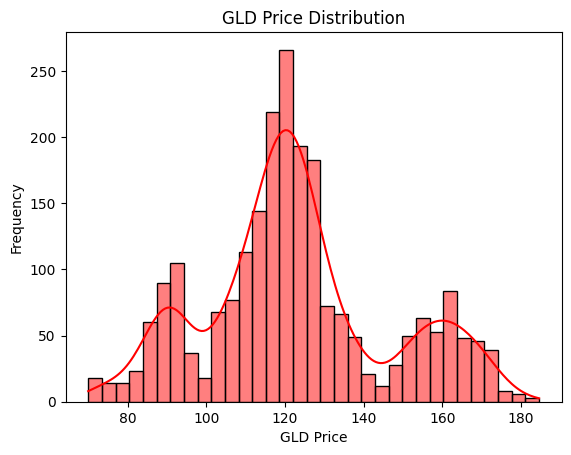

In [14]:
sns.histplot(gold_dataset['GLD'],kde=True,color='red')
plt.title('GLD Price Distribution')
plt.xlabel('GLD Price')
plt.ylabel('Frequency')
plt.show()

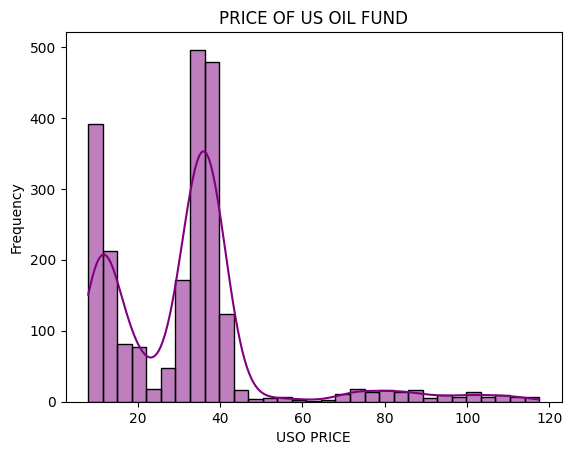

In [15]:
sns.histplot(gold_dataset['USO'],kde=True,color='purple')
plt.title('PRICE OF US OIL FUND')
plt.xlabel('USO PRICE')
plt.ylabel('Frequency')
plt.show()

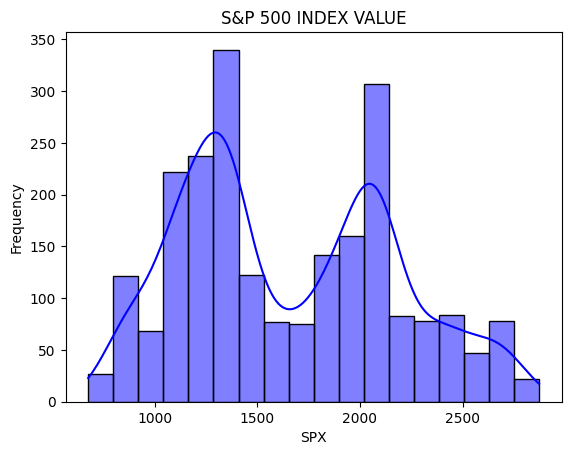

In [16]:
sns.histplot(gold_dataset['SPX'],kde=True,color='blue')
plt.title('S&P 500 INDEX VALUE')
plt.xlabel('SPX')
plt.ylabel('Frequency')
plt.show()

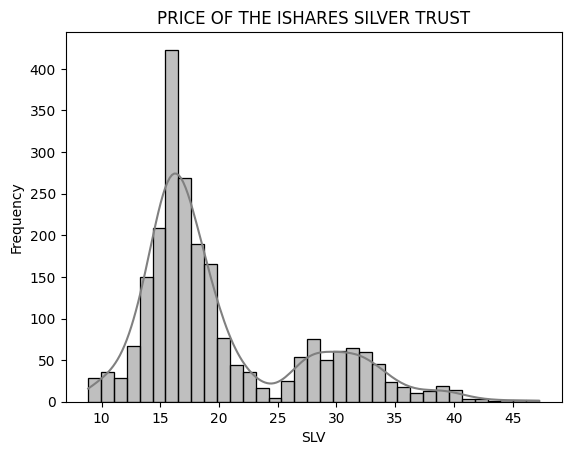

In [17]:
sns.histplot(gold_dataset['SLV'],kde=True,color='grey')
plt.title('PRICE OF THE ISHARES SILVER TRUST')
plt.xlabel('SLV')
plt.ylabel('Frequency')
plt.show()

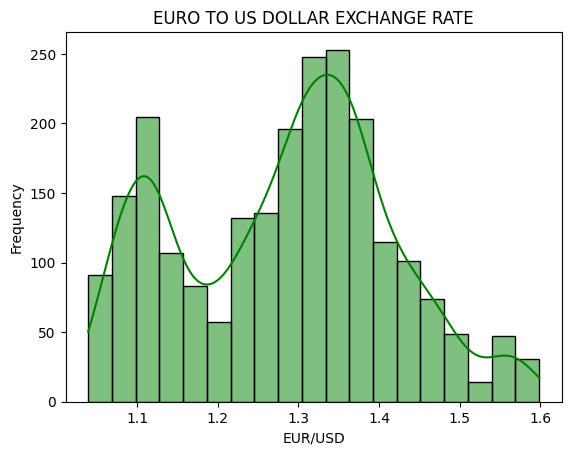

In [18]:
sns.histplot(gold_dataset['EUR/USD'],kde=True,color='green')
plt.title('EURO TO US DOLLAR EXCHANGE RATE')
plt.xlabel('EUR/USD')
plt.ylabel('Frequency')
plt.show()

THE CORRELATION MATRIX

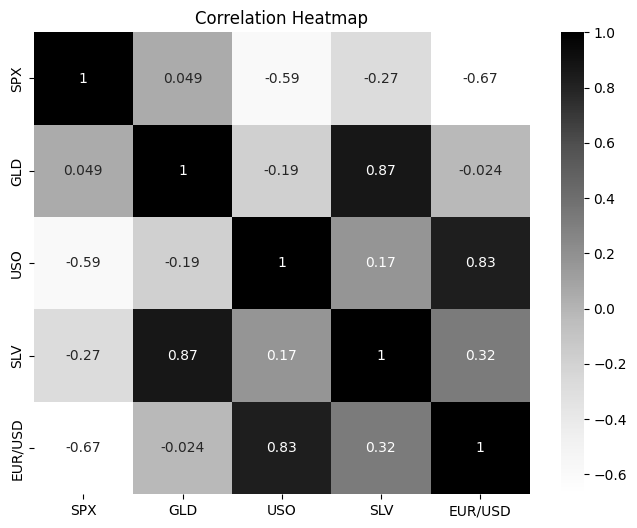

In [19]:
correlation = gold_dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Greys')
plt.title("Correlation Heatmap")
plt.show()

CHECKING CORRELATION OF GLD WITH OTHER VARIABLES

In [20]:
print(correlation['GLD'].sort_values(ascending=False))

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


A SCATTERPLOT TO UNDERSTAND RELATIONSHIPS

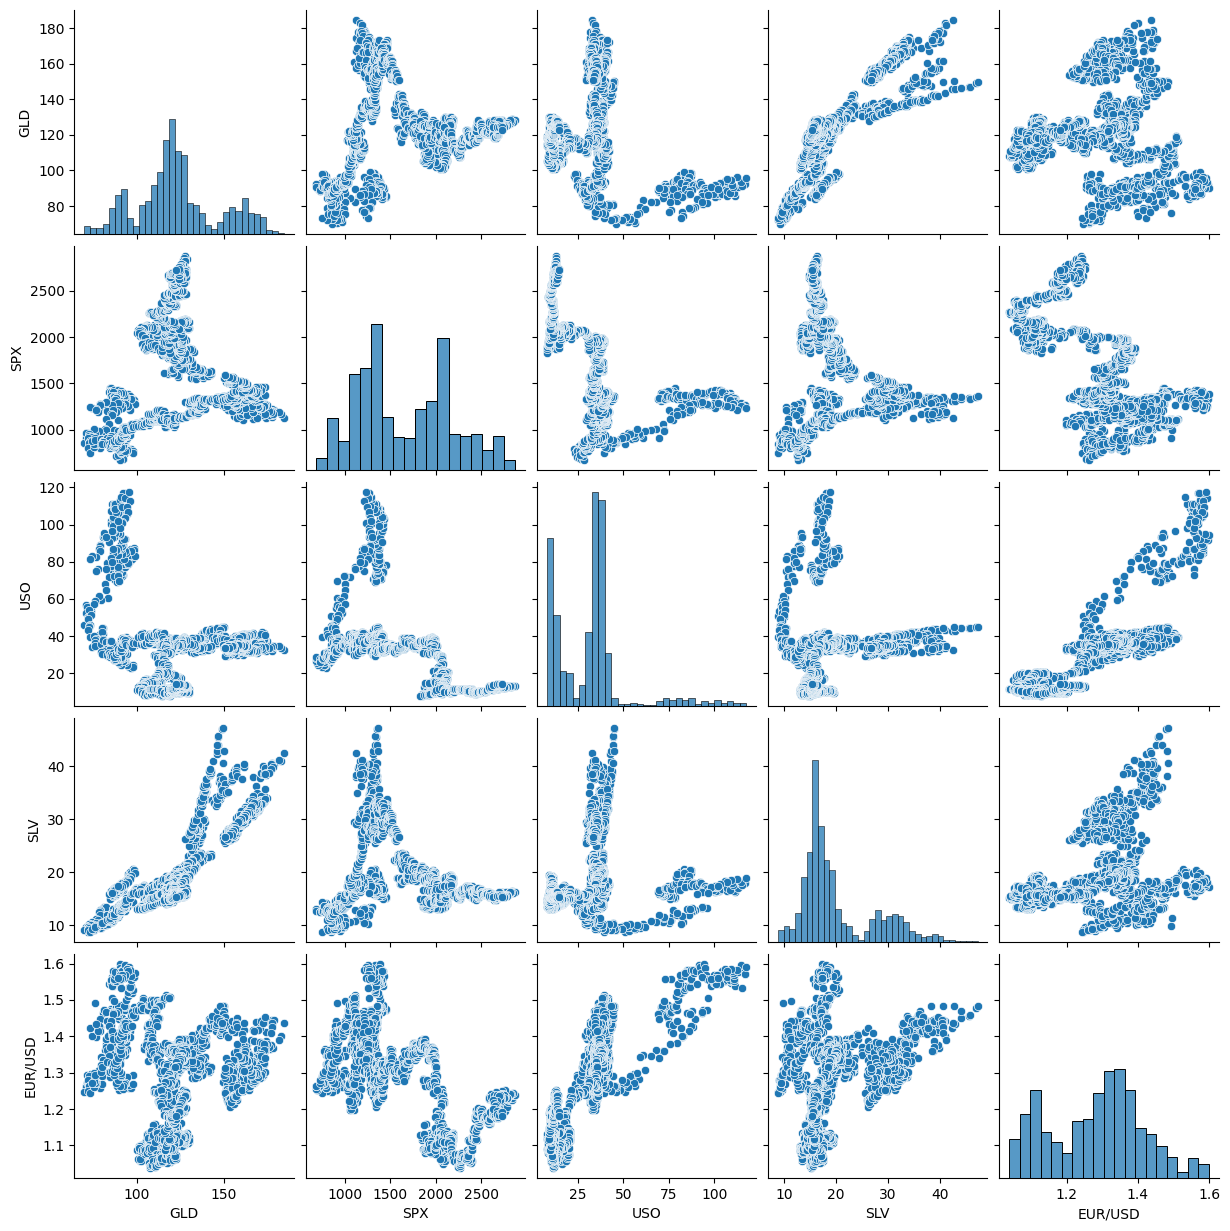

In [21]:
sns.pairplot(gold_dataset[['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']])
plt.show()

CHECKING FOR OUTLIER

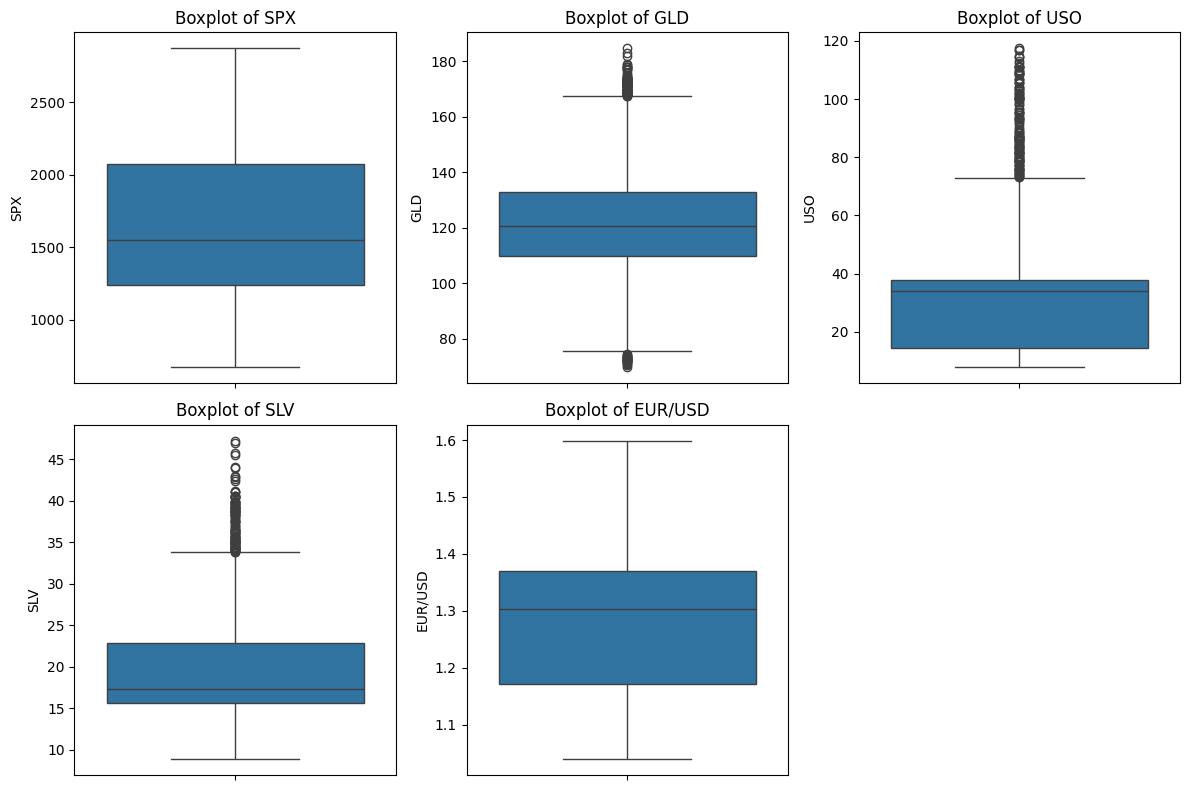

In [22]:
plt.figure(figsize=(12,8))
for i, column in enumerate(gold_dataset.columns, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid based on the number of columns
    sns.boxplot(y=gold_dataset[column])
    plt.title(f"Boxplot of {column}")
    plt.tight_layout()
plt.show()

STEPS TO REMOVE AN OUTLIER

SELECTING NUMERICAL VALUES TO REMOVE OUTLIER

In [23]:
gold_dataset = gold_dataset.select_dtypes(include=["float64", "int64"])

COMPUTING Q1 AND Q3

In [24]:
Q1 = gold_dataset.quantile(0.25)
Q3 = gold_dataset.quantile(0.75)
IQR = Q3 - Q1

In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
gold_dataset = gold_dataset[~((gold_dataset < lower_bound) | (gold_dataset > upper_bound)).any(axis=1)]

In [27]:
print("Shape After Removing Outliers:", gold_dataset.shape)

Shape After Removing Outliers: (1960, 5)


SPLITTING DATA INTO TRAIN AND TEST SETS

In [28]:
X = gold_dataset.drop(columns=["GLD"])
Y = gold_dataset["GLD"]
print(X)
print(Y)

              SPX        USO        SLV   EUR/USD
9     1380.949951  72.779999  15.834000  1.480210
10    1373.199951  71.849998  15.654000  1.466405
11    1333.250000  71.029999  15.717000  1.464000
12    1325.189941  71.540001  16.030001  1.461796
13    1310.500000  70.550003  15.902000  1.464794
...           ...        ...        ...       ...
2285  2671.919922  14.060000  15.510000  1.186789
2286  2697.790039  14.370000  15.530000  1.184722
2287  2723.070068  14.410000  15.740000  1.191753
2288  2730.129883  14.380000  15.560000  1.193118
2289  2725.780029  14.405800  15.454200  1.182033

[1960 rows x 4 columns]
9        87.989998
10       86.699997
11       86.500000
12       87.419998
13       88.169998
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 1960, dtype: float64


In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(1960, 4) (1568, 4) (392, 4)


In [31]:
print(Y_train.shape,Y_test.shape)

(1568,) (392,)


SCALING THE FEATURES

In [32]:
scaler = StandardScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print("Feature scaling complete!")

Feature scaling complete!


MODEL TRAINING

INITIALIZING THE MODELS

In [35]:
lr = LinearRegression()
svr = SVR(kernel="rbf")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100)

TRAINIG MODELS

In [36]:
lr.fit(X_train_scaled, Y_train)
svr.fit(X_train_scaled, Y_train)
rf.fit(X_train_scaled, Y_train)
xgb_model.fit(X_train_scaled, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
print("All models trained successfully!")

All models trained successfully!


PREDICTIONS ON TRAINING DATA

In [38]:
Y_train_pred_lr = lr.predict(X_train_scaled)
Y_train_pred_svr = svr.predict(X_train_scaled)
Y_train_pred_rf = rf.predict(X_train_scaled)
Y_train_pred_xgb = xgb_model.predict(X_train_scaled)



In [39]:
def evaluate_training(Y_train, Y_train_pred, model_name):
    print(f"{model_name} Training Performance:")
    print("R² Score:", r2_score(Y_train, Y_train_pred))
    print("MSE:", mean_squared_error(Y_train, Y_train_pred))
    print("MAE:", mean_absolute_error(Y_train, Y_train_pred))
    print("-" * 30)



In [40]:
evaluate_training(Y_train, Y_train_pred_lr, "Linear Regression")
evaluate_training(Y_train, Y_train_pred_svr, "SVR")
evaluate_training(Y_train, Y_train_pred_rf, "Random Forest")
evaluate_training(Y_train, Y_train_pred_xgb, "XGBoost")


Linear Regression Training Performance:
R² Score: 0.9207788994073707
MSE: 30.611711792174617
MAE: 3.8623799012575546
------------------------------
SVR Training Performance:
R² Score: 0.9442712102158806
MSE: 21.534081685768296
MAE: 2.772692637265291
------------------------------
Random Forest Training Performance:
R² Score: 0.9981251093172255
MSE: 0.7244738181315517
MAE: 0.44392524719387577
------------------------------
XGBoost Training Performance:
R² Score: 0.9997601605127695
MSE: 0.09267603207428929
MAE: 0.21814734448242162
------------------------------


PREDICTIONS ON TEST DATA

In [41]:
Y_pred_lr = lr.predict(X_test_scaled)
Y_pred_svr = svr.predict(X_test_scaled)
Y_pred_rf = rf.predict(X_test_scaled)
Y_pred_xgb = xgb_model.predict(X_test_scaled)

In [42]:
def evaluate_model(Y_test, Y_pred, model_name):
    print(f"{model_name} Performance:")
    print("R² Score:", r2_score(Y_test, Y_pred))
    print("MSE:", mean_squared_error(Y_test, Y_pred))
    print("MAE:", mean_absolute_error(Y_test, Y_pred))
    print("-" * 30)

In [43]:
evaluate_model(Y_test, Y_pred_lr, "Linear Regression")
evaluate_model(Y_test, Y_pred_svr, "SVR")
evaluate_model(Y_test, Y_pred_rf, "Random Forest")
evaluate_model(Y_test, Y_pred_xgb, "XGBoost")

Linear Regression Performance:
R² Score: 0.9173022526464683
MSE: 30.89812390576235
MAE: 3.8081259803688705
------------------------------
SVR Performance:
R² Score: 0.9349802693827667
MSE: 24.29313684134793
MAE: 2.955256828116611
------------------------------
Random Forest Performance:
R² Score: 0.9841840217672098
MSE: 5.909278919514876
MAE: 1.259039606964283
------------------------------
XGBoost Performance:
R² Score: 0.9812825815078374
MSE: 6.993335783313174
MAE: 1.3872548682275885
------------------------------


In [44]:
from xgboost import XGBRegressor
best_xgb = XGBRegressor(objective="reg:squarederror", n_estimators=100)
best_xgb.fit(X_train_scaled, Y_train)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(XGBRegressor(objective="reg:squarederror"), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, Y_train)

best_xgb = grid_search.best_estimator_  # Correctly assign the best model
def tune_xgb():
    grid_search.fit(X_train_scaled, Y_train)
    return grid_search.best_estimator_

best_xgb = tune_xgb()
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_xgb, X_train_scaled, Y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Mean CV R² Score:", cv_scores.mean())


Cross-Validation R² Scores: [0.97505166 0.98537707 0.98562571 0.99159674 0.9924016 ]
Mean CV R² Score: 0.9860105541215987


DEPLOYMENT

In [49]:
import pickle

with open("predictive_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)


In [50]:

with open("predictive_model.pkl", "rb") as f:
    model = pickle.load(f)


In [51]:
import numpy as np

def predict_gld_price(features):

    features_array = np.array(features).reshape(1, -1)  # Reshape for model input
    prediction = model.predict(features_array)
    return prediction[0]

# Example usage
sample_input = [1447.160034,78.470001,15.18,1.471692]  # Replace with actual feature values
print("Predicted GLD Price:", predict_gld_price(sample_input))


Predicted GLD Price: 152.83914


COMPARE THE ACTUAL AND PREDICTED VALUES

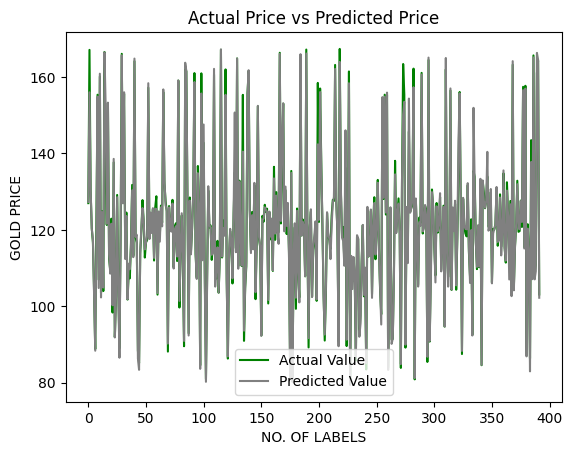

In [52]:
Y_test=list(Y_test)
plt.plot(Y_test,color='green',label='Actual Value')
plt.plot(Y_pred_xgb,color='grey',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('NO. OF LABELS')
plt.ylabel('GOLD PRICE')
plt.legend()
plt.show()